In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

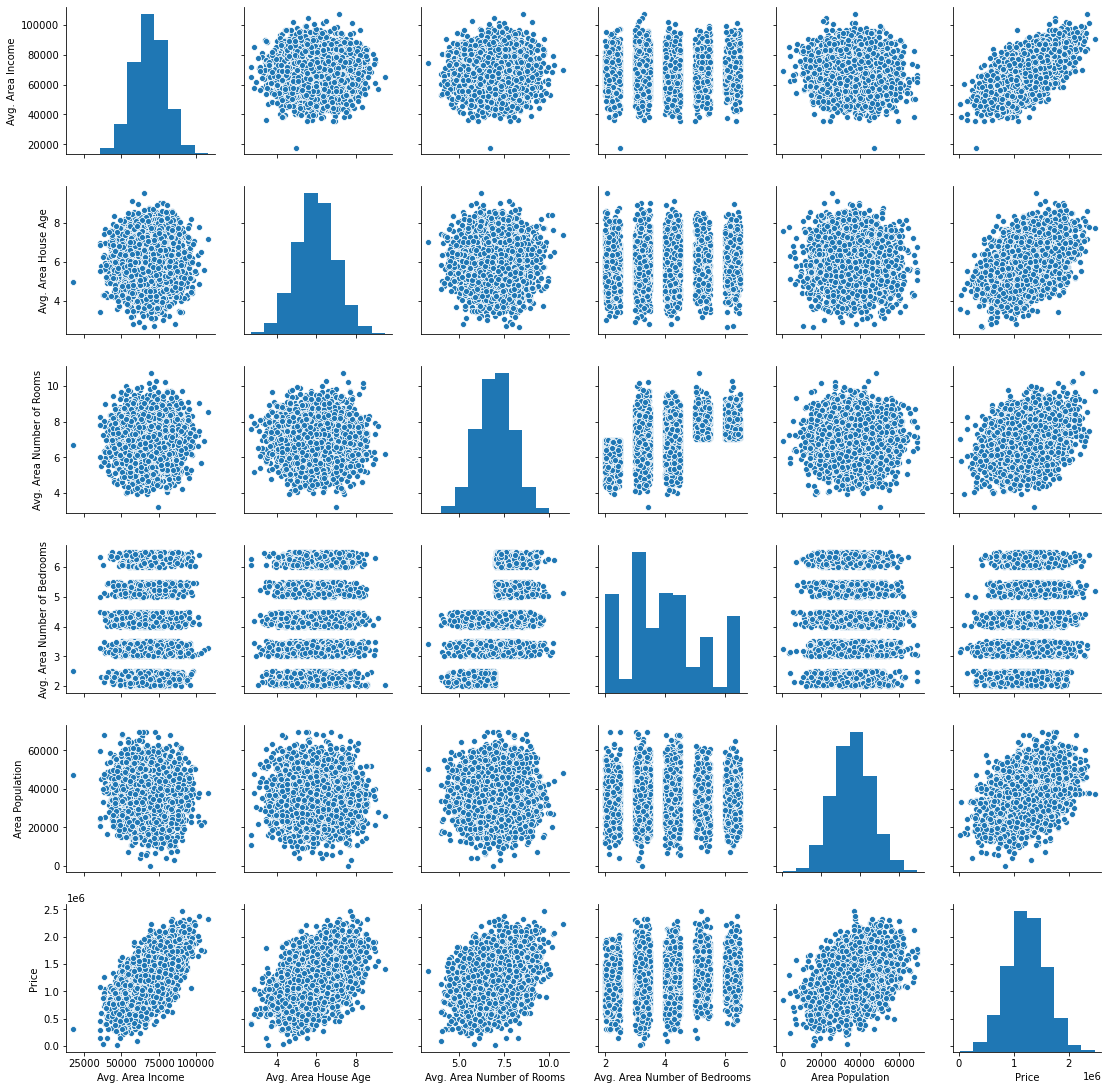

In [8]:
sns.pairplot(df)

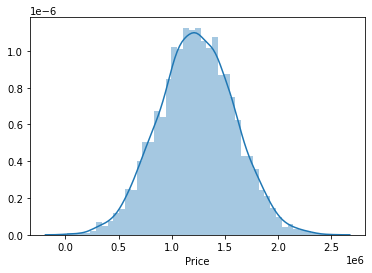

In [9]:
## Finding distribution of our target column which is price

sns.distplot(df['Price'])

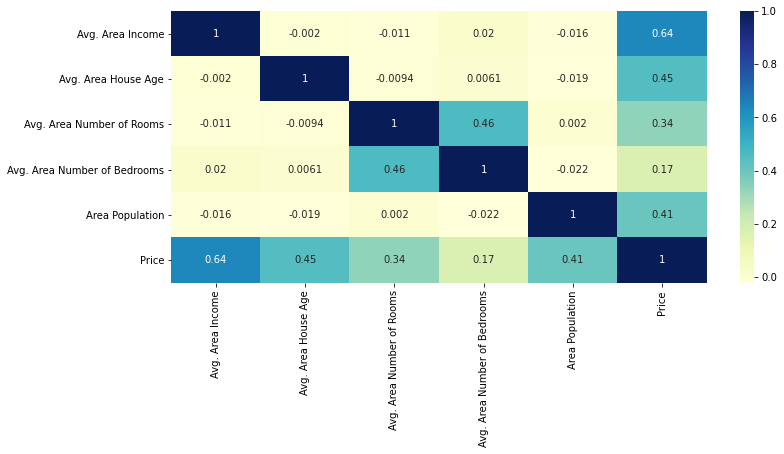

In [10]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

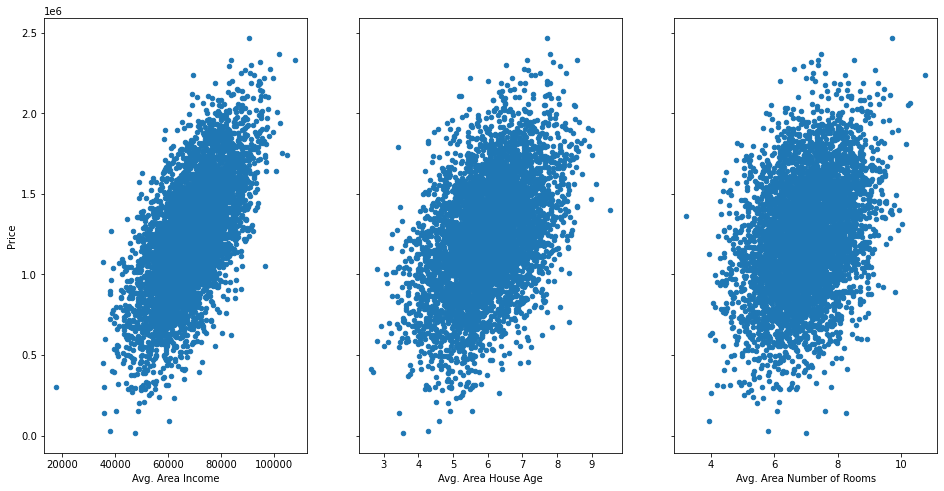

In [11]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Avg. Area Income', y='Price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Avg. Area House Age', y='Price', ax=axs[1])
df.plot(kind='scatter', x='Avg. Area Number of Rooms', y='Price', ax=axs[2])

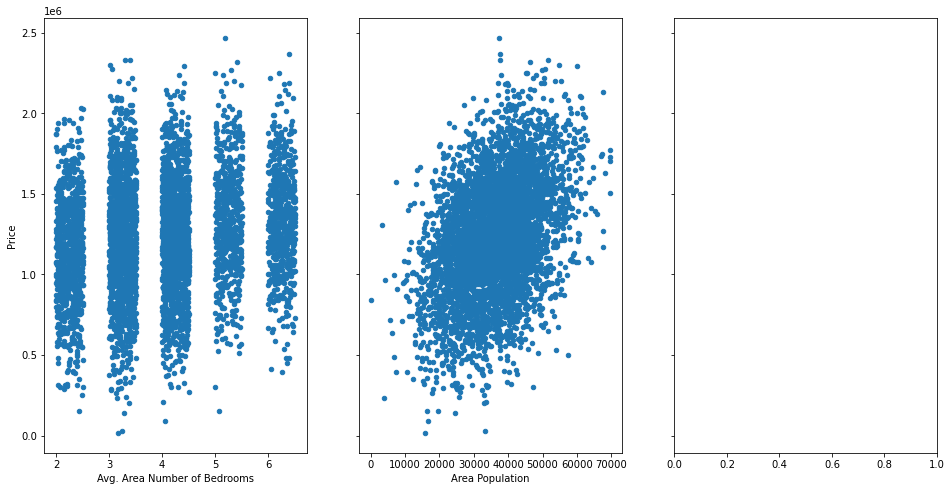

In [12]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Avg. Area Number of Bedrooms', y='Price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Area Population', y='Price', ax=axs[1])
#df.plot(kind='scatter', x='Address', y='Price', ax=axs[2])

In [13]:
df.rename(columns={'Avg. Area Income':'Avg_Area_Income','Avg. Area House Age':'Avg_Area_House_Age',
                  'Avg. Area Number of Rooms':'Avg_Area_Number_of_Rooms','Avg. Area Number of Bedrooms':'Avg_Area_Number_of_Bedrooms',
                  'Area Population':'Area_Population'},inplace=True)

In [14]:
df.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

In [15]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Price ~ Avg_Area_Income + Avg_Area_House_Age +Avg_Area_Number_of_Rooms +Avg_Area_Number_of_Bedrooms +Area_Population', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:31:27   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
Avg_Area_Income                21.5780      0.134    160.656      0.000      21.315      21.841
Avg_Area_House_Age           1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
Avg_Area_Number_of_Rooms     1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
Avg_Area_Number_of_Bedrooms  1651.1391   1308.671      1.262      0.207    -914.431    4216.709
Area_Population                15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
lm = smf.ols(formula='Price ~ Avg_Area_Income + Avg_Area_House_Age +Avg_Area_Number_of_Rooms', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     4635.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:05:51   Log-Likelihood:                -67641.
No. Observations:                5000   AIC:                         1.353e+05
Df Residuals:                    4996   BIC:                         1.353e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2.057e+06   2.92e+04    -70.513      0.000   -2.11e+06      -2e+06
Avg_Area_Income             21.3527      0.241     88.596      0.000      20.880      21.825
Avg_Area_House_Age        1.628e+05   2590.813     62.839      0.000    1.58e+05    1.68e+05
Avg_Area_Number_of_Rooms  1.219e+05   2553.931     47.711      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                        1.040   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.986
Skew:                           0.025   Prob(JB):                        0.611
Kurtosis:                       3.047   Cond. No.                     7.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# create X and y
feature_cols = ['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population']
X = df[feature_cols]
y = df['Price']

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i=i+1

The Coefficient of  Avg_Area_Income  is:  21.57804944834929
The Coefficient of  Avg_Area_House_Age  is:  165637.02694086757
The Coefficient of  Avg_Area_Number_of_Rooms  is:  120659.94881629785
The Coefficient of  Avg_Area_Number_of_Bedrooms  is:  1651.1390540228588
The Coefficient of  Area_Population  is:  15.200743923725677


In [21]:
df.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

In [23]:
## Removing the address columns
X = df[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms','Avg_Area_Number_of_Bedrooms', 
        'Area_Population']]
y =  df['Price']

Train and test split#  `

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [27]:
X_train

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population
1303,68091.179676,5.364208,7.502956,3.10,44557.379656
1051,75729.765546,5.580599,7.642973,4.21,29996.018448
4904,70885.420819,6.358747,7.250241,5.42,38627.301473
931,73386.407340,4.966360,7.915453,4.30,38413.490484
4976,75046.313791,5.351169,7.797825,5.23,34107.888619
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [28]:
X_test

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,7.427689,6.22,26008.309124
345,73643.057298,6.766853,8.337085,3.34,43152.139577
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
54,72942.705059,4.786222,7.319886,6.41,24377.909049
...,...,...,...,...,...
1776,65173.050438,7.679469,6.602618,4.23,44125.540782
4269,42969.659393,6.295501,7.885507,4.38,29594.089863
1661,48735.924512,5.543730,6.091906,2.43,19682.347295
2410,65081.584048,5.433570,9.212518,5.14,37594.493458


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
## checking models coeficient and then will see how to interpret them

In [33]:
print(lm.intercept_)

-2640159.796852963


In [34]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [37]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [38]:
cdf

,Coeff
Avg_Area_Income,21.528276
Avg_Area_House_Age,164883.282027
Avg_Area_Number_of_Rooms,122368.678027
Avg_Area_Number_of_Bedrooms,2233.801864
Area_Population,15.150420


#### How to interpre this coeficient

if we look at first feature, Avg_Area_income:
        if we fix all the other feature and just consider Avg_Area_income only then 1 unit increase in Avg_Area_income
        is associated with 21.5 $ increase in price.
        
        Like wise 1 unit increase in each of the feature contributes to increase of associted price increase in $ shown in 
        Coeff Column

## Predictions

In [39]:
prediction = lm.predict(X_test)

In [40]:
prediction

array([1260960.70567628,  827588.75560322, 1742421.24254349, ...,
        372191.40626905, 1365217.15140899, 1914519.54178899])

In [41]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

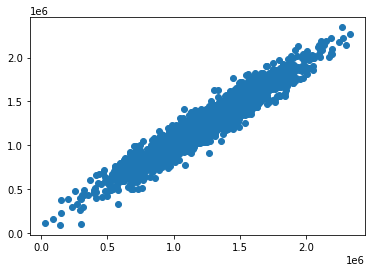

In [44]:
plt.scatter(y_test,prediction)

Creating histogram of our residuals

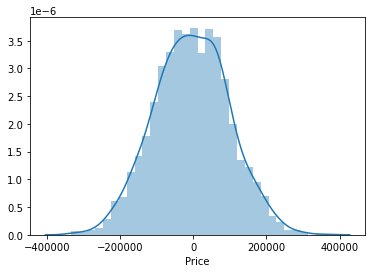

In [45]:
sns.distplot((y_test - prediction))

Our residuals looks to be normally distributed, its a very good sign
If we have normally distributed residuals it means model was a correct sign for a data
if this is not normally distributed and we some kind of wierd behaviour is going on then we might have to look back to 
our data and check to if linear regression was a correct choice for dataset

## Evaluation matrix for Linear Regression

Mean Absolute error(MAE): this is the mean of absolute value of the errors
    
Mean Squared Error (MSE) : is the mean of squared errors:
        
Root Mean Squared Error: This is the mean of squared Errors


#### Comparing these errors

MAE is the easiest to understand, because it's a average error
MSE is more popular than the MAE, because MSE will punishes the larger errors, which tends to more useful in real world
RMSE is even more popular than RMSE, as RMSE is interpretable in "y" units

All of these are the loss functions because we want to minimize them.

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mean_absolute_error(y_test,prediction)

82288.22251914945

In [48]:
mean_squared_error(y_test,prediction)

10460958907.208807

In [49]:
np.sqrt(mean_squared_error(y_test,prediction))

102278.82922290814

In [ ]:
## Hyper Parameter tunining